In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('data2.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set

In [4]:
data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [5]:
data.shape

(47, 3)

In [6]:
#Hypothesis
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [7]:
#Gradient Descent
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [8]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [9]:
#Feature Scaling
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [10]:
mean

array([2000.68085106,    3.17021277])

In [11]:
std

array([7.86202619e+02, 7.52842809e-01])

In [12]:
theta, cost = linear_regression(X_train, y_train,0.0001, 300000)

In [13]:
theta

array([[340412.65957418, 109447.6892473 ,  -6578.24763182]])

Text(0, 0.5, 'Cost')

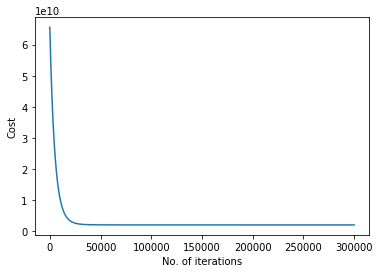

In [14]:
#Cost
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,300001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')